In [21]:
#Import the main libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import holidays
from sklearn import metrics

In [22]:
df_meteo = pd.read_csv('open-meteo-38.70N9.20W4m.csv')
# Convert the 'MTU' column to datetime format
df_meteo['time'] = pd.to_datetime(df_meteo['time'])

# Set the 'MTU' column as the index
df_meteo.set_index('time', inplace=True)

#Changing the name to Date_Hour
df_meteo.index.name = 'Date_Hour'

df_meteo

,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
Date_Hour,,,,,,,,,,,,
2022-01-01 00:00:00,12.5,86.0,11.7,0.0,0.0,18.0,6.5,0,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,11.7,89.0,10.8,0.0,0.0,29.0,6.1,0,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,12.2,90.0,11.5,0.0,0.0,30.0,5.6,0,0.0,0.0,0.0,0.0
2022-01-01 03:00:00,12.1,90.0,11.3,0.0,0.0,15.0,6.7,0,0.0,0.0,0.0,0.0
2022-01-01 04:00:00,11.5,91.0,10.6,0.0,0.0,30.0,6.1,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2024-04-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2024-04-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [23]:
#Rename the columns
df_meteo = df_meteo.rename(columns={'temperature_2m (°C)':'Temperature (°C)', 
                                    'relative_humidity_2m (%)':'Relative Humidity (%)',
                                    'apparent_temperature (°C)':'Apparent Temperature (°C)',
                                    'precipitation (mm)':'Precipitation (mm)', 
                                    'rain (mm)':'Rain (mm)', 
                                    'cloud_cover (%)':'Cloud cover (%)', 
                                    'wind_speed_10m (km/h)':'Wind speed 10m (km/h)', 
                                    'is_day ()':'Day', 
                                    'sunshine_duration (s)':'Sunshine Duration (s)', 
                                    'direct_radiation (W/m²)': 'Direct Radiation (W/m²)', 
                                    'diffuse_radiation (W/m²)':'Diffuse Radiation (W/m²)', 
                                    'direct_normal_irradiance (W/m²)':'Direct Normal Irradiance (W/m²)'})
df_meteo


,Temperature (°C),Relative Humidity (%),Apparent Temperature (°C),Precipitation (mm),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Day,Sunshine Duration (s),Direct Radiation (W/m²),Diffuse Radiation (W/m²),Direct Normal Irradiance (W/m²)
Date_Hour,,,,,,,,,,,,
2022-01-01 00:00:00,12.5,86.0,11.7,0.0,0.0,18.0,6.5,0,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,11.7,89.0,10.8,0.0,0.0,29.0,6.1,0,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,12.2,90.0,11.5,0.0,0.0,30.0,5.6,0,0.0,0.0,0.0,0.0
2022-01-01 03:00:00,12.1,90.0,11.3,0.0,0.0,15.0,6.7,0,0.0,0.0,0.0,0.0
2022-01-01 04:00:00,11.5,91.0,10.6,0.0,0.0,30.0,6.1,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2024-04-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2024-04-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [24]:
df_2024 = pd.read_csv('Actual Generation per Production Type_202401010000-202501010000.csv') #2024 dataset
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Area                                                       8785 non-null   object
 1   MTU                                                        8785 non-null   object
 2   Biomass  - Actual Aggregated [MW]                          8784 non-null   object
 3   Fossil Brown coal/Lignite  - Actual Aggregated [MW]        8784 non-null   object
 4   Fossil Coal-derived gas  - Actual Aggregated [MW]          8784 non-null   object
 5   Fossil Gas  - Actual Aggregated [MW]                       8784 non-null   object
 6   Fossil Hard coal  - Actual Aggregated [MW]                 8784 non-null   object
 7   Fossil Oil  - Actual Aggregated [MW]                       8784 non-null   object
 8   Fossil Oil shale  

In [25]:
# Convert the 'MTU' column to datetime format
# Extract only the datetime part from the 'MTU' column
df_2024['MTU'] = df_2024['MTU'].str.split(' - ').str[0]

# Convert the 'MTU' column to datetime format
df_2024['MTU'] = pd.to_datetime(df_2024['MTU'], format='%d.%m.%Y %H:%M')

# Set the 'MTU' column as the index
df_2024.set_index('MTU', inplace=True)

#Changing the name to Date_Hour
df_2024.index.name = 'Date_Hour'

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8785 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Area                                                       8785 non-null   object
 1   Biomass  - Actual Aggregated [MW]                          8784 non-null   object
 2   Fossil Brown coal/Lignite  - Actual Aggregated [MW]        8784 non-null   object
 3   Fossil Coal-derived gas  - Actual Aggregated [MW]          8784 non-null   object
 4   Fossil Gas  - Actual Aggregated [MW]                       8784 non-null   object
 5   Fossil Hard coal  - Actual Aggregated [MW]                 8784 non-null   object
 6   Fossil Oil  - Actual Aggregated [MW]                       8784 non-null   object
 7   Fossil Oil shale  - Actual Aggregated [MW]                 8784 non-n

In [26]:
# Drop all columns except for 'Solar - Actual Aggregated [MW]'
df_2024 = df_2024[['Solar  - Actual Aggregated [MW]']]

# Rename the column to 'Solar Power Aggregated'
df_2024.rename(columns={'Solar  - Actual Aggregated [MW]': 'Solar Power Aggregated [MW]'}, inplace=True)

# Now your DataFrame contains only the 'Solar Power Aggregated' column
df_2024

,Solar Power Aggregated [MW]
Date_Hour,
2024-01-01 00:00:00,0
2024-01-01 01:00:00,0
2024-01-01 02:00:00,0
2024-01-01 03:00:00,0
2024-01-01 04:00:00,0
...,...
2024-12-31 19:00:00,-
2024-12-31 20:00:00,-
2024-12-31 21:00:00,-


In [27]:
df_2024.dropna(inplace=True) #Drop Nan values
df_2024

,Solar Power Aggregated [MW]
Date_Hour,
2024-01-01 00:00:00,0
2024-01-01 01:00:00,0
2024-01-01 02:00:00,0
2024-01-01 03:00:00,0
2024-01-01 04:00:00,0
...,...
2024-12-31 19:00:00,-
2024-12-31 20:00:00,-
2024-12-31 21:00:00,-


In [28]:
test_cutoff_date='2024-01-01'
df_2024_meteo = df_meteo.loc[df_meteo.index >= test_cutoff_date] #2024
df_2024_meteo.dropna(inplace=True)  #Drop Nan values
df_2024.dropna(inplace=True)  #Drop Nan values
df_2024_meteo

C:\Users\jguerreiro\AppData\Local\Temp\ipykernel_18620\3102672742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_meteo.dropna(inplace=True)  #Drop Nan values


,Temperature (°C),Relative Humidity (%),Apparent Temperature (°C),Precipitation (mm),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Day,Sunshine Duration (s),Direct Radiation (W/m²),Diffuse Radiation (W/m²),Direct Normal Irradiance (W/m²)
Date_Hour,,,,,,,,,,,,
2024-01-01 00:00:00,9.3,93.0,7.9,0.0,0.0,43.0,5.9,0,0.00,0.0,0.0,0.0
2024-01-01 01:00:00,10.4,89.0,9.3,0.0,0.0,27.0,5.4,0,0.00,0.0,0.0,0.0
2024-01-01 02:00:00,9.8,89.0,8.5,0.0,0.0,2.0,5.6,0,0.00,0.0,0.0,0.0
2024-01-01 03:00:00,8.9,88.0,7.3,0.0,0.0,13.0,6.3,0,0.00,0.0,0.0,0.0
2024-01-01 04:00:00,8.7,89.0,7.1,0.0,0.0,9.0,6.0,0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30 19:00:00,11.5,73.0,8.2,0.0,0.0,48.0,17.2,0,1064.98,16.0,23.0,124.5
2024-03-30 20:00:00,11.1,74.0,7.6,0.0,0.0,100.0,18.1,0,0.00,0.0,0.0,0.0
2024-03-30 21:00:00,10.8,80.0,7.7,0.1,0.1,92.0,16.6,0,0.00,0.0,0.0,0.0


In [29]:
print(df_2024.columns)
print(df_2024_meteo.columns)

Index(['Solar Power Aggregated [MW]'], dtype='object')
Index(['Temperature (°C)', 'Relative Humidity (%)',
       'Apparent Temperature (°C)', 'Precipitation (mm)', 'Rain (mm)',
       'Cloud cover (%)', 'Wind speed 10m (km/h)', 'Day',
       'Sunshine Duration (s)', 'Direct Radiation (W/m²)',
       'Diffuse Radiation (W/m²)', 'Direct Normal Irradiance (W/m²)'],
      dtype='object')


In [30]:
df_2024 = df_2024.join(df_2024_meteo) #Join the meteorological and Solar Power dataset
df_2024.dropna(inplace = True)
df_2024

,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Apparent Temperature (°C),Precipitation (mm),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Day,Sunshine Duration (s),Direct Radiation (W/m²),Diffuse Radiation (W/m²),Direct Normal Irradiance (W/m²)
Date_Hour,,,,,,,,,,,,,
2024-01-01 00:00:00,0,9.3,93.0,7.9,0.0,0.0,43.0,5.9,0.0,0.00,0.0,0.0,0.0
2024-01-01 01:00:00,0,10.4,89.0,9.3,0.0,0.0,27.0,5.4,0.0,0.00,0.0,0.0,0.0
2024-01-01 02:00:00,0,9.8,89.0,8.5,0.0,0.0,2.0,5.6,0.0,0.00,0.0,0.0,0.0
2024-01-01 03:00:00,0,8.9,88.0,7.3,0.0,0.0,13.0,6.3,0.0,0.00,0.0,0.0,0.0
2024-01-01 04:00:00,0,8.7,89.0,7.1,0.0,0.0,9.0,6.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30 19:00:00,54,11.5,73.0,8.2,0.0,0.0,48.0,17.2,0.0,1064.98,16.0,23.0,124.5
2024-03-30 20:00:00,0,11.1,74.0,7.6,0.0,0.0,100.0,18.1,0.0,0.00,0.0,0.0,0.0
2024-03-30 21:00:00,0,10.8,80.0,7.7,0.1,0.1,92.0,16.6,0.0,0.00,0.0,0.0,0.0


In [31]:
df_2024 = df_2024.drop(columns=['Apparent Temperature (°C)', 'Precipitation (mm)', 'Day', 'Sunshine Duration (s)', 'Diffuse Radiation (W/m²)','Direct Normal Irradiance (W/m²)',]) #Drop irrelevant columns
df_2024

,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Direct Radiation (W/m²)
Date_Hour,,,,,,,
2024-01-01 00:00:00,0,9.3,93.0,0.0,43.0,5.9,0.0
2024-01-01 01:00:00,0,10.4,89.0,0.0,27.0,5.4,0.0
2024-01-01 02:00:00,0,9.8,89.0,0.0,2.0,5.6,0.0
2024-01-01 03:00:00,0,8.9,88.0,0.0,13.0,6.3,0.0
2024-01-01 04:00:00,0,8.7,89.0,0.0,9.0,6.0,0.0
...,...,...,...,...,...,...,...
2024-03-30 19:00:00,54,11.5,73.0,0.0,48.0,17.2,16.0
2024-03-30 20:00:00,0,11.1,74.0,0.0,100.0,18.1,0.0
2024-03-30 21:00:00,0,10.8,80.0,0.1,92.0,16.6,0.0


In [32]:
# Define a function to categorize months into seasons
def season(month):
    # December, January, and February are categorized as season 0 (winter)
    if month in [12, 1, 2]:  
        return 0
    # March, April, and May are categorized as season 1 (spring)
    elif month in [3, 4, 5]:  
        return 1
    # June, July, and August are categorized as season 1 (summer)
    elif month in [6, 7, 8]:  
        return 1
    # All other months are categorized as season 1 (autumn)
    else:  
        return 1

# Extract the month component from the index of df_2024 and assign it to a new column 'Month'
df_2024['Month'] = df_2024.index.month
df_2024['Hot Seasons'] = df_2024['Month'].apply(season)

# Apply the 'season'

df_2024

,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Direct Radiation (W/m²),Month,Hot Seasons
Date_Hour,,,,,,,,,
2024-01-01 00:00:00,0,9.3,93.0,0.0,43.0,5.9,0.0,1,0
2024-01-01 01:00:00,0,10.4,89.0,0.0,27.0,5.4,0.0,1,0
2024-01-01 02:00:00,0,9.8,89.0,0.0,2.0,5.6,0.0,1,0
2024-01-01 03:00:00,0,8.9,88.0,0.0,13.0,6.3,0.0,1,0
2024-01-01 04:00:00,0,8.7,89.0,0.0,9.0,6.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
2024-03-30 19:00:00,54,11.5,73.0,0.0,48.0,17.2,16.0,3,1
2024-03-30 20:00:00,0,11.1,74.0,0.0,100.0,18.1,0.0,3,1
2024-03-30 21:00:00,0,10.8,80.0,0.1,92.0,16.6,0.0,3,1


In [33]:
df_2024['Solar Power-1h']=df_2024['Solar Power Aggregated [MW]'].shift(1) # Previous hour production
df_2024['Solar Power-2h']=df_2024['Solar Power-1h'].shift(1) # Second previous hour production
df_2024['Hour'] = df_2024.index.hour
df_2024

,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Direct Radiation (W/m²),Month,Hot Seasons,Solar Power-1h,Solar Power-2h,Hour
Date_Hour,,,,,,,,,,,,
2024-01-01 00:00:00,0,9.3,93.0,0.0,43.0,5.9,0.0,1,0,None,None,0
2024-01-01 01:00:00,0,10.4,89.0,0.0,27.0,5.4,0.0,1,0,0,None,1
2024-01-01 02:00:00,0,9.8,89.0,0.0,2.0,5.6,0.0,1,0,0,0,2
2024-01-01 03:00:00,0,8.9,88.0,0.0,13.0,6.3,0.0,1,0,0,0,3
2024-01-01 04:00:00,0,8.7,89.0,0.0,9.0,6.0,0.0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30 19:00:00,54,11.5,73.0,0.0,48.0,17.2,16.0,3,1,416,679,19
2024-03-30 20:00:00,0,11.1,74.0,0.0,100.0,18.1,0.0,3,1,54,416,20
2024-03-30 21:00:00,0,10.8,80.0,0.1,92.0,16.6,0.0,3,1,0,54,21


In [34]:
test_cutoff_date='2024-01-02'
df_2024 = df_2024.loc[df_2024.index <= test_cutoff_date] #2024
df_2024 = df_2024.dropna()  #Drop Nan values
df_2024

,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Direct Radiation (W/m²),Month,Hot Seasons,Solar Power-1h,Solar Power-2h,Hour
Date_Hour,,,,,,,,,,,,
2024-01-01 02:00:00,0,9.8,89.0,0.0,2.0,5.6,0.0,1,0,0,0,2
2024-01-01 03:00:00,0,8.9,88.0,0.0,13.0,6.3,0.0,1,0,0,0,3
2024-01-01 04:00:00,0,8.7,89.0,0.0,9.0,6.0,0.0,1,0,0,0,4
2024-01-01 05:00:00,0,8.1,88.0,0.0,30.0,6.6,0.0,1,0,0,0,5
2024-01-01 06:00:00,0,8.0,87.0,0.0,3.0,7.3,0.0,1,0,0,0,6
2024-01-01 07:00:00,0,7.3,89.0,0.0,7.0,9.6,0.0,1,0,0,0,7
2024-01-01 08:00:00,1,6.6,96.0,0.0,32.0,9.8,0.0,1,0,0,0,8
2024-01-01 09:00:00,120,9.4,94.0,0.0,9.0,7.9,34.0,1,0,1,0,9
2024-01-01 10:00:00,542,11.0,86.0,0.0,4.0,6.2,143.0,1,0,120,1,10


In [35]:
# Convert the 'Solar Power Aggregated [MW]' column to numeric values. If there are any errors during conversion, coerce them (i.e., set them as NaN).
df_2024['Solar Power Aggregated [MW]'] = pd.to_numeric(df_2024['Solar Power Aggregated [MW]'], errors='coerce')
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2024-01-01 02:00:00 to 2024-01-02 00:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Solar Power Aggregated [MW]  23 non-null     int64  
 1   Temperature (°C)             23 non-null     float64
 2   Relative Humidity (%)        23 non-null     float64
 3   Rain (mm)                    23 non-null     float64
 4   Cloud cover (%)              23 non-null     float64
 5   Wind speed 10m (km/h)        23 non-null     float64
 6   Direct Radiation (W/m²)      23 non-null     float64
 7   Month                        23 non-null     int32  
 8   Hot Seasons                  23 non-null     int64  
 9   Solar Power-1h               23 non-null     object 
 10  Solar Power-2h               23 non-null     object 
 11  Hour                         23 non-null     int32  
dtypes: float64(6), int32(2), int64(2), object(

In [36]:
import pickle
#Load model
with open('BT_model.pkl','rb') as file:
    BT_model=pickle.load(file)

In [37]:
# Convert the DataFrame df_2024 into a numpy array
Z = df_2024.values

# Extract the values from the first column of the array
Y = Z[:, 0]

# Extract the values from the columns at indices 1, 2, 6, 9, and 10 of the array
X2 = Z[:, [1,2,6,9,10]]


In [38]:
df_2024.head()


,Solar Power Aggregated [MW],Temperature (°C),Relative Humidity (%),Rain (mm),Cloud cover (%),Wind speed 10m (km/h),Direct Radiation (W/m²),Month,Hot Seasons,Solar Power-1h,Solar Power-2h,Hour
Date_Hour,,,,,,,,,,,,
2024-01-01 02:00:00,0,9.8,89.0,0.0,2.0,5.6,0.0,1,0,0,0,2
2024-01-01 03:00:00,0,8.9,88.0,0.0,13.0,6.3,0.0,1,0,0,0,3
2024-01-01 04:00:00,0,8.7,89.0,0.0,9.0,6.0,0.0,1,0,0,0,4
2024-01-01 05:00:00,0,8.1,88.0,0.0,30.0,6.6,0.0,1,0,0,0,5
2024-01-01 06:00:00,0,8.0,87.0,0.0,3.0,7.3,0.0,1,0,0,0,6


In [39]:
BT_model

BaggingRegressor()

In [40]:
Y_B = BT_model.predict(X2)  # Predicts the output using the trained BaggingRegressor model (BT_model) on the input features X2

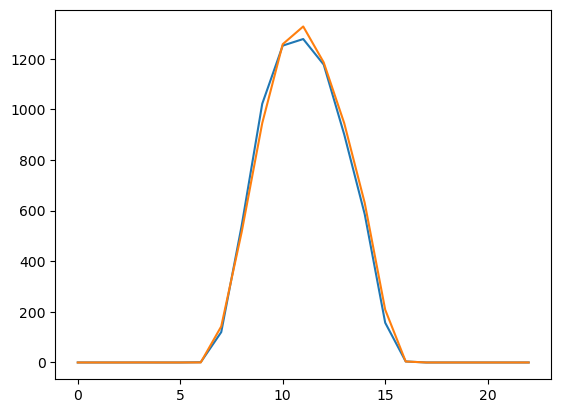

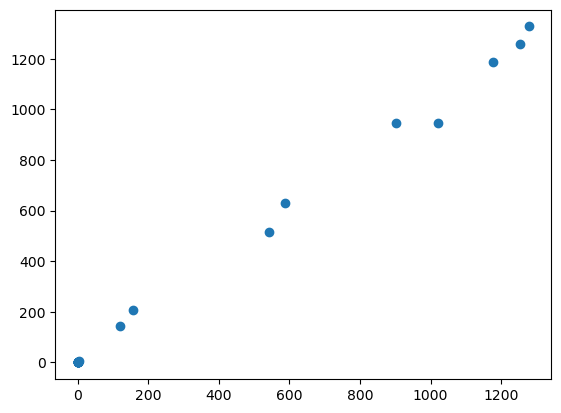

In [41]:
plt.plot(Y)
plt.plot(Y_B)
plt.show()
plt.scatter(Y,Y_B)

In [42]:
MAE_RF=metrics.mean_absolute_error(Y,Y_B)
MBE_RF=np.mean(Y-Y_B)
MSE_RF=metrics.mean_squared_error(Y,Y_B)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y,Y_B))
cvRMSE_RF = RMSE_RF / np.mean(Y)
NMBE_RF=MBE_RF/np.mean(Y)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

14.339999999999993 -5.392173913043472 703.2347999999995 26.518574622328394 0.08663738868090243 -0.017616477272727252
